In [2]:
import sys, os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import corner

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import urllib.request
url = "https://raw.githubusercontent.com/tcollett/LensPop/master/lenses_Euclid.txt"
urllib.request.urlretrieve(url, "lenses_Euclid.txt")

('lenses_Euclid.txt', <http.client.HTTPMessage at 0x10dbe8518>)

In [4]:
lenses_Euclid = pd.read_csv("lenses_Euclid.txt", skiprows=24, header=None, delimiter=' ')

In [5]:
with open("lenses_Euclid.txt") as myfile:
    head = [next(myfile) for x in range(24)]
print(head)

['#Lens population discoverable in the Euclid\n', '#\n', '#The population was forecast by T.Collett (ICG, Portsmouth) - please cite Collett (2015)\n', '#\n', '#Each line in the table represents a single lens. The table represnts 0.1 of the full sky (i.e. each lens should be weighted by A/4200, where A is the area of the survey in square degrees)\n', '#The columns in the table are:\n', '#------------------------------------\n', '#[0] zl, lens redshift \n', '#[1] zs, source redshift \n', '#[2] b, Einstein radius (arcseconds) \n', '#[3] sig_v, lens velocity dispersion (km/s) \n', '#[4] ql, lens flattening (1=circular, q=1-e) \n', '#[5] rl, lens half light radius (arcseconds) NB/ sersic index is 4\n', '#[6] lens VIS band magnitude\n', '#[7] xs, source x coordinate relative, 0 is lens centre (arcseconds) \n', '#[8] ys, source y coordinate relative, 0 is lens centre (arcseconds) \n', '#[9] qs, source flattening (1=circular, q=1-e) \n', '#[10] ps, source position angle (degrees)\n', '#[11] rs

In [6]:
data = np.transpose([np.log10(lenses_Euclid[0]), np.log10(lenses_Euclid[1]), np.log10(lenses_Euclid[2]), lenses_Euclid[3],  np.log10(lenses_Euclid[4]), lenses_Euclid[7], lenses_Euclid[8], np.log10(lenses_Euclid[11]), lenses_Euclid[12], lenses_Euclid[15]])
labels = ['$z_l$','$z_s$','$\log10\\theta_E$', '$\sigma_v$', '$q$', '$\\theta_x$','$\\theta_y$', '$\\theta_s$', 'mag', 'TS']
lenses_pd = pd.DataFrame(data, columns=labels)

/Users/smsharma/.conda/envs/Lensing-PowerSpectra/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [7]:
# Apply cuts---only pick higher-TS lenses (TS > 50); low-TS lenses no good for substructure!
lenses_pd_cuts = lenses_pd[(lenses_pd['$\\theta_s$'] > -np.inf) & (lenses_pd['TS'] > 50) ]

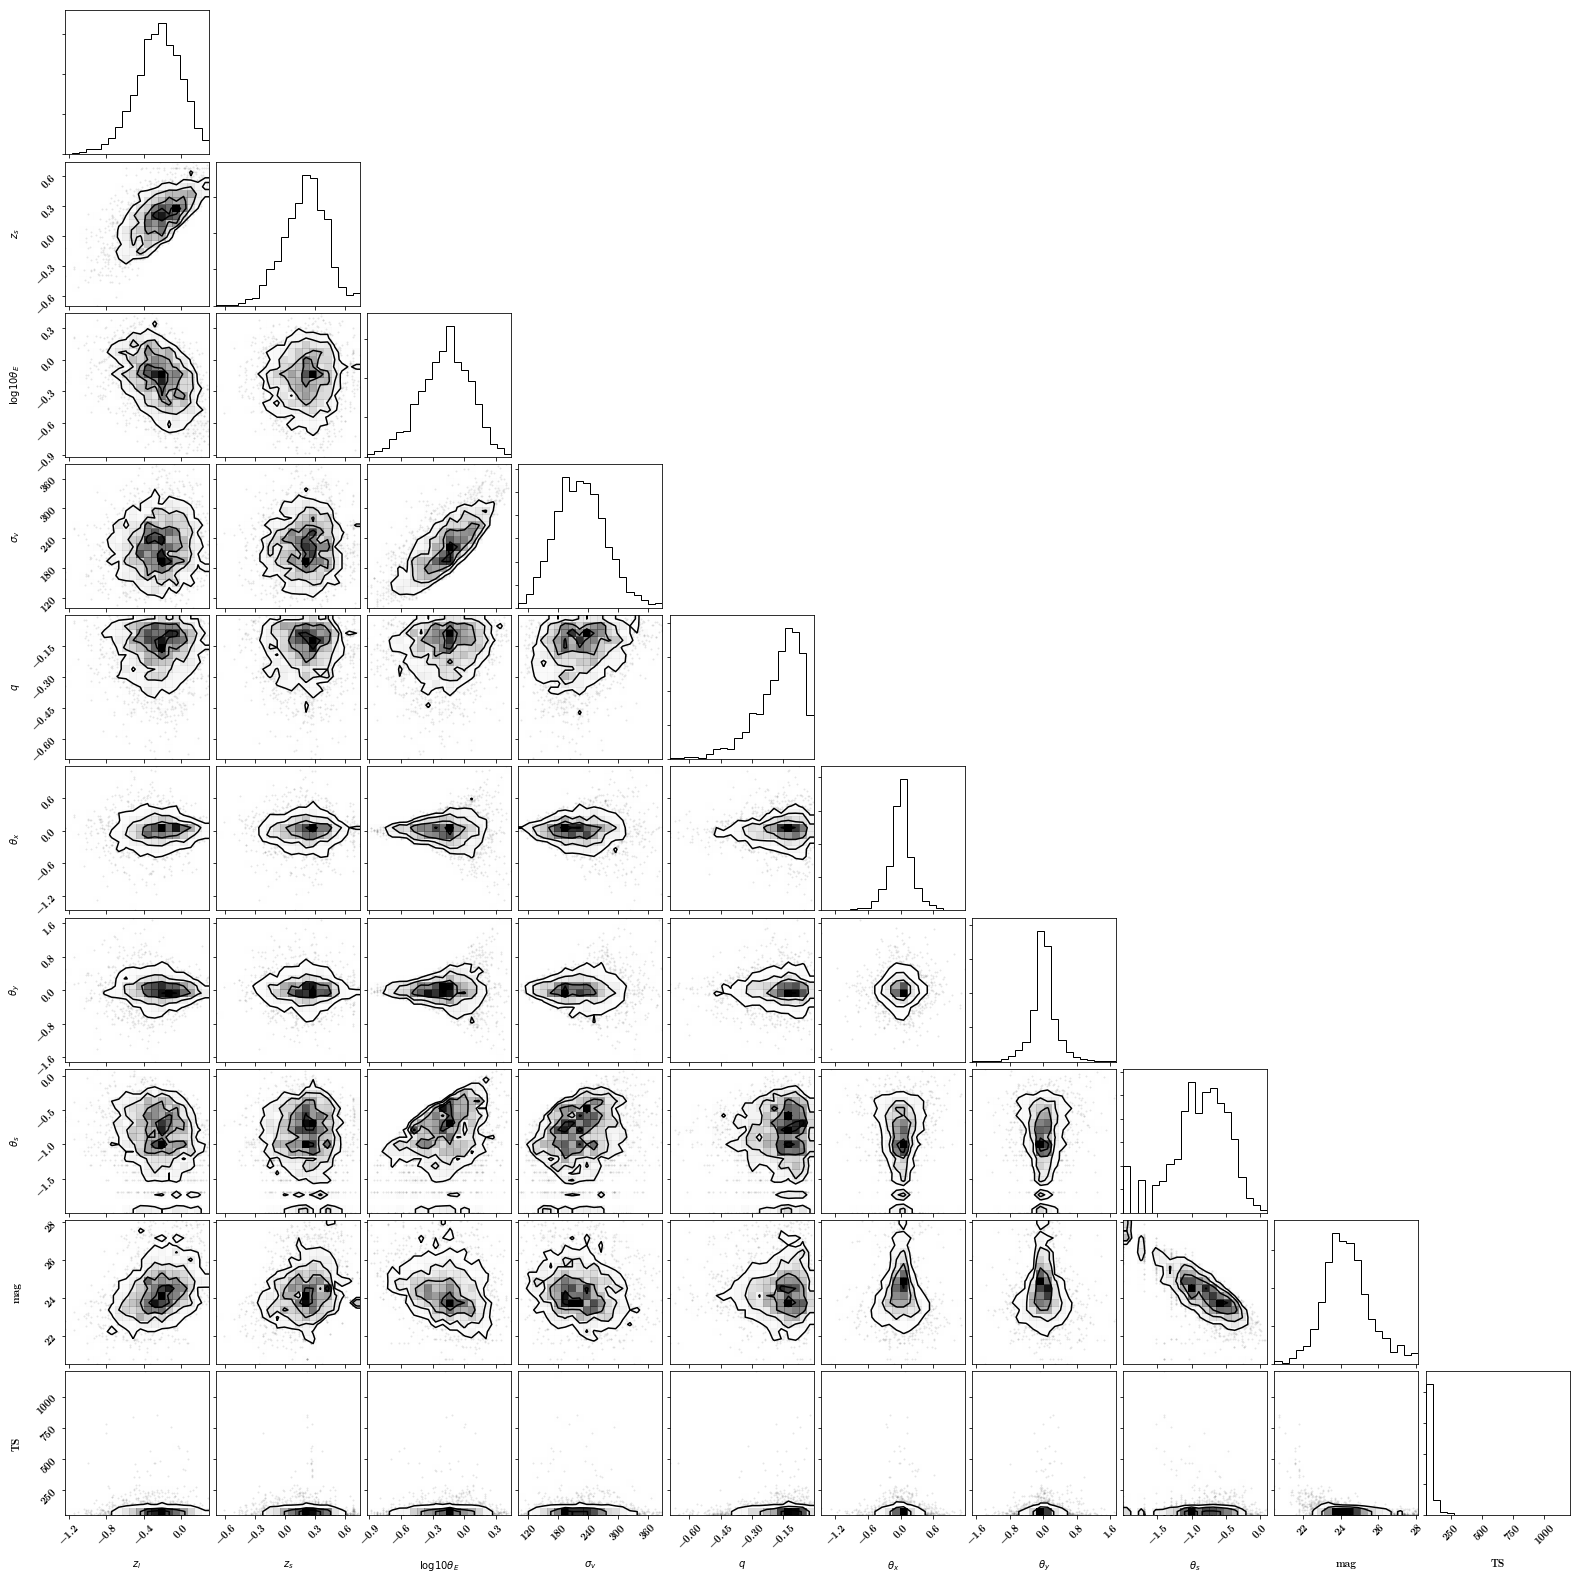

In [8]:
corner.corner(lenses_pd_cuts);

In [34]:
# Get multivariate-Gaussian mean and covariance matrix describing lensing parameters

mean = np.mean(lenses_pd_cuts, axis=0)
cov = np.cov(lenses_pd_cuts, rowvar=0)

In [38]:
10 ** cov[0,0]

1.1499156588579473

In [17]:
np.sqrt(10 ** (cov[0,0]))

1.0723412044950746

In [85]:
mean['$z_l$']

-0.24869850322995857

In [99]:
np.sqrt(cov[6,6])

0.31415145647602227

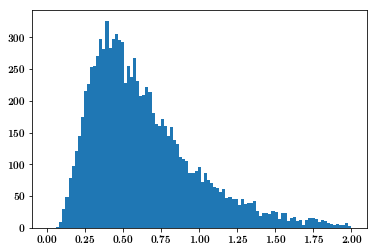

In [97]:
plt.hist(10 ** np.random.normal(-0.25, 0.25, 10000), bins = np.linspace(0,2,100));


In [93]:
np.sqrt(cov[3,3])

49.97802802742747

(array([   14.,   116.,   457.,  1426.,  2656.,  2799.,  1733.,   634.,
          145.,    20.]),
 array([  34.53928222,   71.7997497 ,  109.06021718,  146.32068466,
         183.58115214,  220.84161962,  258.10208711,  295.36255459,
         332.62302207,  369.88348955,  407.14395703]),
 <a list of 10 Patch objects>)

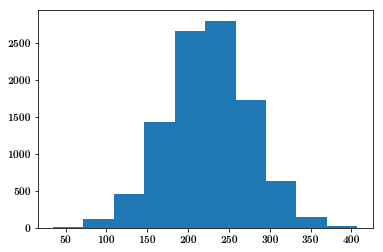

In [92]:
plt.hist(np.random.normal(mean['$\sigma_v$'], np.sqrt(cov[3,3]), 10000))

In [9]:
np.savez("../../simulation/data/sim_mvgauss.npz", mean=mean, cov=cov)

In [10]:
# lenses_Euclid_sel = lenses_Euclid[(lenses_Euclid[1] > 0.) * (lenses_Euclid[1] < 20.) * (lenses_Euclid[11] < 10)]
# lenses_Euclid_sel2 = lenses_Euclid[(lenses_Euclid[1] > 1.) * (lenses_Euclid[1] < 1.2) * (lenses_Euclid[11] < 0.2) * (lenses_Euclid[11] > 0.02)]

# plt.hist(lenses_Euclid_sel[12], bins = np.linspace(22,30,20), histtype='step', normed=True);
# plt.hist(lenses_Euclid_sel2[12], bins = np.linspace(22,30,20), histtype='step', normed=True);

